## 1. Apply necessary image preprocessing steps

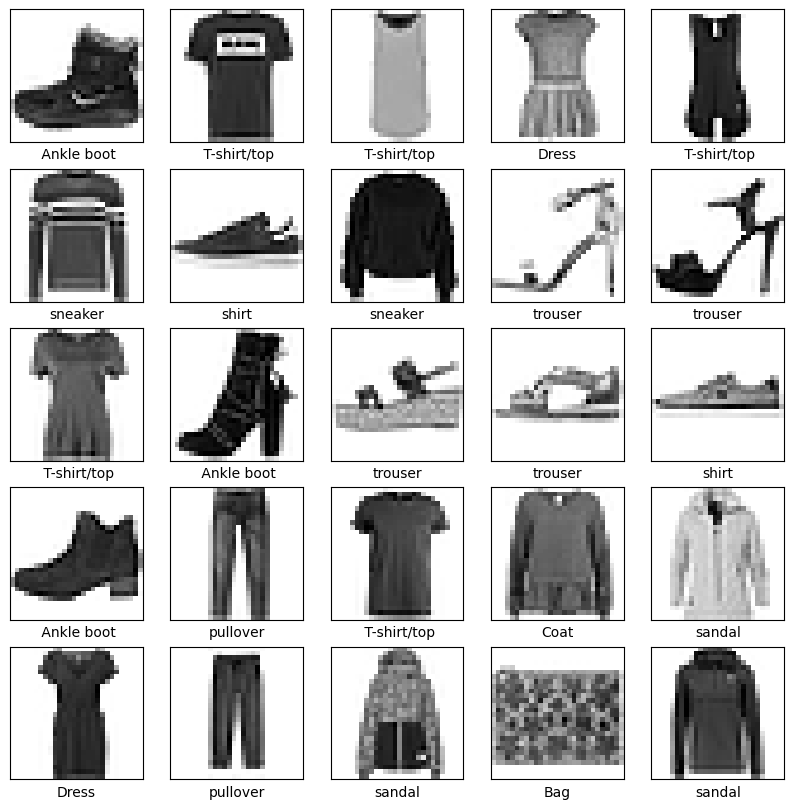

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

class_names = [' T-shirt/top', 'pullover', 'sneaker', 'Dress', 
               'sandal', 'trouser', 'Coat', 'shirt', 'Bag',' Ankle boot']
plot_sample_images( train_images, train_labels, class_names)




In [91]:
train_images = train_images/255.0
test_images = test_images/255.0

train_labels = train_labels.reshape(-1)  
test_labels = test_labels.reshape(-1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)



###  2. Implement the ANN with using PyTorch/TensorFlow with the necessary numberof hidden layers 
###  3. Use appropriate activation functions and loss functions

In [115]:

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense( 10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir='logs')

In [111]:
history= model.fit(train_images, train_labels, 
                   epochs =10, 
                   validation_split=0.2,
                   callbacks=[tensorboard_callback])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4987 - loss: 0.8798 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5007 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5002 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4976 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4979 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4981 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4970 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4965 - loss: 0.6935 - 

## 4. Train the model and evaluate performance metrics

In [173]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_labels = to_categorical(train_labels, 10)  
test_labels = to_categorical(test_labels, 10)   

(train_labels.shape)
(test_labels.shape)   

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

model.save('fashion_mnist_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.1176 - loss: 108.5385


Test accuracy: 0.1211


In [175]:
loaded_model= tf.keras.models.load_model('fashion_mnist_model.h5')

loaded_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,284 (462.05 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 5. Define a function which takes an input image and returns the output object class using the trained model.

In [169]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

#first we load our trained model
model = load_model(r"C:\Users\Chinmay\fashion_mnist_model.h5")

# Load and preprocess the image
img = Image.open(r"C:\Users\Chinmay\fashion_mnist_sample.jpg").convert("L") 
img = img.resize((28, 28)) 

# Convert image to numpy array and normalize
img_array = np.array(img)
img_array = img_array / 255.0  

# Reshape the image to match the model's input shape
img_array = img_array.reshape(1, 28, 28, 1)

#predict the class 
predictions= model.predict(img_array)

#Get the predicted class index
predicted_class= np.argmax(predictions)

#Mapping the class index to actual class name
class_names=[' T-shirt/top', 'pullover', 'sneaker', 'Dress', 
               'sandal', 'trouser', 'Coat', 'shirt', 'Bag',' Ankle boot'
            ]
predicted_label = class_names[predicted_class]
print(f'Predicted label:{predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label: Ankle boot
